In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import math
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Referenced Youtube Tutorial
def LinearRegression(x,y):
    n = len(x)
    x_avg = np.sum(x)/n
    y_avg = np.sum(y)/n

    Sxy = np.sum((x-x_avg).reshape(-1)*(y-y_avg).reshape(-1))
    Sx = np.sum((x-x_avg)**2)

    m = Sxy/Sx
    return m

In [3]:
aerosol1 = '/Users/eva/Desktop/ALLDATAAEROSOL/b.e11.B20TRLENS_RCP85.f09_g16.xbmb.001.cam.h0.AODVIS.192001-202912.nc'

nc1 = Dataset(aerosol1)

AODVIS = nc1.variables['AODVIS']
lat = nc1.variables['lat']
lon = nc1.variables['lon']

latitude = lat[:]
longitude = lon[:]

In [4]:
timeseries = [[0 for x in range(len(longitude))] for y in range(len(latitude))] 

for i in range(len(longitude)):
    for j in range(len(latitude)):
        timeseries[j][i] = AODVIS[600:1200, j, i]

In [12]:
for i in range(len(longitude)):
    for j in range(len(latitude)):
        temp = timeseries[j][i]
        timeseries[j][i] = temp[:420]


In [ ]:
mag_change = [[0 for x in range(len(longitude))] for y in range(len(latitude))]  

for i in range(len(longitude)):
    for j in range(len(latitude)):
        m = LinearRegression(range(420),timeseries[j][i])
        mag_change[j][i] = m*420
        print(m*420)

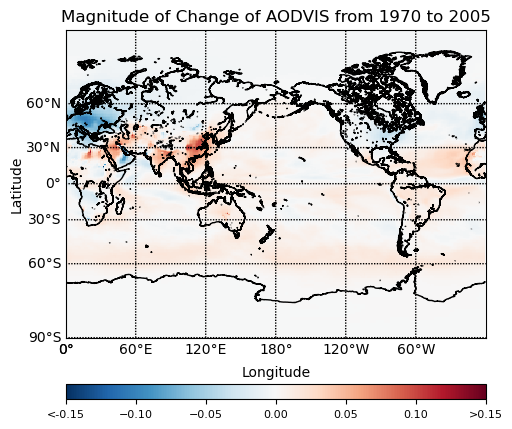

In [ ]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib import colors

fig = plt.figure()
map = Basemap(projection='mill', llcrnrlon=0, llcrnrlat=-90, urcrnrlon=360, urcrnrlat=90,resolution='i')
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
lons, lats = np.meshgrid(longitude, latitude)
x,y = map(lons,lats)
time = np.arange(600).reshape(-1, 1)

aer = map.pcolormesh(x, y, mag_change, cmap=plt.get_cmap('RdBu_r'), vmin=-0.15,vmax=0.15)
cb = map.colorbar(aer, "bottom", size="5%", pad="15%")
cb.ax.tick_params(labelsize=8)

labels = [item.get_text() for item in cb.ax.get_xticklabels()]
labels[0] = '<-0.15'
labels[len(labels)-1] = '>0.15'

cb.ax.set_xticklabels(labels)

plt.title ("Magnitude of Change of AODVIS from 1970 to 2005")
plt.xlabel("Longitude", labelpad=20)
plt.ylabel("Latitude", labelpad=30)
plt.show()